In [1]:
test_data_path = '/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Test_data_images'
trainc_data_path = '/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Training Dataset_csv'
trainv_data_path = '/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Training Dataset_Videos'
frames_path = '/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Frames'

In [2]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

In [3]:
training_csvs = []
training_videos = []
for VIDEO_FILE in tqdm(os.listdir(trainv_data_path)):
  VIDEO_PATH = os.path.join(trainv_data_path, VIDEO_FILE)
  FILE = VIDEO_FILE.split('.')[0]
  CSV_FILE = FILE + '_LABELS.csv'
  CSV_PATH = os.path.join(trainc_data_path, CSV_FILE)
  training_videos.append(VIDEO_PATH)
  training_csvs.append(pd.read_csv(CSV_PATH))

100%|██████████| 280/280 [00:00<00:00, 367.46it/s]


In [27]:
def extract_frames(folder_path, video_file, csv_file):
  cap = cv2.VideoCapture(video_file)
  FRAME_COUNT = len(csv_file)
  fps = cap.get(cv2.CAP_PROP_FPS)
  interval = int(round(fps / 30))
  frame_count = 0
  count = 0
  VIDEO_NAME  = video_file.split('/')[-1].split('.')[0]
  VIDEO_DIR = os.path.join(folder_path, VIDEO_NAME)

  if not os.path.exists(VIDEO_DIR):
    os.makedirs(VIDEO_DIR)

  while cap.isOpened():
    if frame_count > FRAME_COUNT:
      break
    ret, frame = cap.read()
    if ret:
      count += 1
      if count % interval == 0:
        if frame_count < 10:
          frame_ncount = '00' + str(frame_count)
        elif frame_count < 100:
          frame_ncount = '0' + str(frame_count)
        else:
          frame_ncount = frame_count
        IMAGE_FILE = VIDEO_NAME + '_' + str(frame_ncount) + '.jpg'
        IMAGE_PATH = os.path.join(VIDEO_DIR, IMAGE_FILE)
        cv2.imwrite(IMAGE_PATH, frame)   
        frame_count += 1        
      else:
        break
  cap.release()

In [28]:
def extract_frames_from_videos(folder_path, training_videos, training_csvs):
  for i in range(len(training_videos)):
    extract_frames(folder_path, training_videos[i], training_csvs[i])
    print(training_videos[i] + ' - Uploaded')

In [29]:
extract_frames_from_videos(frames_path, training_videos, training_csvs)

/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Training Dataset_Videos/V_DRONE_045.mp4 - Uploaded
/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Training Dataset_Videos/V_DRONE_051.mp4 - Uploaded
/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Training Dataset_Videos/V_DRONE_079.mp4 - Uploaded
/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Training Dataset_Videos/V_DRONE_086.mp4 - Uploaded
/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Training Dataset_Videos/V_AIRPLANE_008.mp4 - Uploaded
/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Training Dataset_Videos/V_DRONE_092.mp4 - Uploaded
/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Training Dataset_Videos/V_AIRPLANE_020.mp4 - Uploaded
/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Training Dataset_Videos/V_AIRPLANE_034.mp4 - Uploaded
/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Training Dataset_Videos/V_BIRD_049.mp4 - Uploaded
/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Training Dataset_Videos/V_HELICOPTER_060.mp

In [56]:
def make_video_csv(frames_path, training_csv):
  frames = []
  for FRAME in os.listdir(frames_path):
    FRAME_PATH = os.path.join(frames_path, FRAME)
    frames.append(FRAME_PATH)
  frames = sorted(frames)
  training_csv['Frame Path'] = frames[:-1]
  training_csv.drop(training_csv.columns[0], inplace=True, axis=1)
  return training_csv

In [57]:
def make_csv(frames_path, training_videos, training_csvs):
  for i in range(len(training_csvs)):
    VIDEO_NAME = training_videos[i].split('/')[-1].split('.')[0]
    FRAME_DIR = os.path.join(frames_path, VIDEO_NAME)
    training_csvs[i] = make_video_csv(FRAME_DIR, training_csvs[i])

In [58]:
make_csv(frames_path, training_videos, training_csvs)

In [79]:
def combine_csv(training_csvs):
    dataframe = pd.DataFrame()
    paths = []
    coord1 = []
    coord2 = []
    coord3 = []
    coord4 = []

    for i in range(len(training_csvs)):
        df = training_csvs[i]
        paths.extend(list(df.iloc[:,4]))
        coord1.extend(list(df.iloc[:,0]))
        coord2.extend(list(df.iloc[:,1]))
        coord3.extend(list(df.iloc[:,2]))
        coord4.extend(list(df.iloc[:,3]))

    dataframe['frame_path'] = paths
    dataframe['coord1'] = coord1
    dataframe['coord2'] = coord2
    dataframe['coord3'] = coord3
    dataframe['coord4'] = coord4

    return dataframe

In [80]:
dataframe = combine_csv(training_csvs)
dataframe.head()

,frame_path,coord1,coord2,coord3,coord4
0,/Applications/PES/6 Sem/TDL/HACKATHON/samplepe...,[],[],"[213.708663940430,308.540191650391,40.03988647...",[]
1,/Applications/PES/6 Sem/TDL/HACKATHON/samplepe...,[],[],"[213.460311889648,305.138519287109,40.04492187...",[]
2,/Applications/PES/6 Sem/TDL/HACKATHON/samplepe...,[],[],"[213.408721923828,301.971313476563,39.73330688...",[]
3,/Applications/PES/6 Sem/TDL/HACKATHON/samplepe...,[],[],"[213.172195434570,298.607818603516,39.75404357...",[]
4,/Applications/PES/6 Sem/TDL/HACKATHON/samplepe...,[],[],"[212.819076538086,295.227935791016,39.97137451...",[]


In [81]:
len(dataframe)

87365

In [82]:
dataframe.to_csv(os.path.join('/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Dataframe', 'dataframe.csv'))

In [12]:
dataframe = pd.read_csv('/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Dataframe/dataframe.csv')

In [13]:
def create_dataframe(dataframe):
    paths = dataframe.iloc[:,1]
    labels = []
    coords = []

    for i in range(len(paths)):
        if 'AIRPLANE' in paths[i]:
            labels.append('AIRPLANE')
            coords.append(dataframe.iloc[i,2])
        elif 'BIRD' in paths[i]:
            labels.append("BIRD")
            coords.append(dataframe.iloc[i,3])
        elif 'DRONE' in paths[i]:
            labels.append('DRONE')
            coords.append(dataframe.iloc[i,4])     
        elif 'HELICOPTER' in paths[i]:
            labels.append('HELICOPTER')
            coords.append(dataframe.iloc[i,5])   

    dataframe = pd.DataFrame()
    dataframe['paths'] = paths
    dataframe['coords'] = coords
    dataframe['labels'] = labels

    return dataframe

In [14]:
edataframe = create_dataframe(dataframe)
edataframe.head()

,paths,coords,labels
0,/Applications/PES/6 Sem/TDL/HACKATHON/samplepe...,"[213.708663940430,308.540191650391,40.03988647...",DRONE
1,/Applications/PES/6 Sem/TDL/HACKATHON/samplepe...,"[213.460311889648,305.138519287109,40.04492187...",DRONE
2,/Applications/PES/6 Sem/TDL/HACKATHON/samplepe...,"[213.408721923828,301.971313476563,39.73330688...",DRONE
3,/Applications/PES/6 Sem/TDL/HACKATHON/samplepe...,"[213.172195434570,298.607818603516,39.75404357...",DRONE
4,/Applications/PES/6 Sem/TDL/HACKATHON/samplepe...,"[212.819076538086,295.227935791016,39.97137451...",DRONE


In [15]:
edataframe.to_csv(os.path.join('/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Dataframe', 'edataframe.csv'))

In [3]:
edataframe = pd.read_csv('/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Dataframe/edataframe.csv')
edataframe = edataframe.sample(frac=0.2)

In [4]:
import ast

In [5]:
def clean_dataframe(edataframe):
    fx = list(edataframe['paths'].values)
    fy = list(edataframe['coords'].values)
    labels = list(edataframe['labels'].values)

    temp_b0 = list()
    remove0 = list()

    for i in tqdm(range(len(fy))):
        try:
            temp = ast.literal_eval(fy[i])[:4]
            list_of_floats = [float(x) for x in temp]
            if len(list_of_floats) == 0:
                remove0.append(i)
                continue
            temp_b0.append(list_of_floats)
        except:
            remove0.append(i)

    temp_f0 = []
    temp_c0 = []
    index = 0
    for i in tqdm(range(len(fx))):
        if index < len(remove0) and i == remove0[index]:
            index += 1
        else:
            temp_f0.append(fx[i])
            temp_c0.append(labels[i])

    remove1 = []
    for i in tqdm(range(len(temp_f0))):
        if not os.path.exists(temp_f0[i]):
            remove1.append(i)

    frames = []
    boundaries = []
    classes = []
    index = 0
    for i in tqdm(range(len(temp_f0))):
        if index < len(remove1) and i == remove1[index]:
            index += 1
        else:
            frames.append(temp_f0[i])
            boundaries.append(temp_b0[i])
            classes.append(temp_c0[i])
    
    return frames, boundaries, classes

In [6]:
frames_path, boundaries, classes = clean_dataframe(edataframe)
print(len(frames_path), len(boundaries), len(classes))

100%|██████████| 16614/16614 [00:00<00:00, 1133370.74it/s]

16614 16614 16614


In [7]:
def change_boundaries(bdrs, h=640, w=512, new_h=256, new_w=256):
  h_scale_factor = new_h / h
  w_scale_factor = new_w / w

  for i in tqdm(range(len(bdrs))):
    bdrs[i][0] = bdrs[i][0] * w_scale_factor
    bdrs[i][1] = bdrs[i][1] * h_scale_factor
    bdrs[i][2] = bdrs[i][2] * w_scale_factor
    bdrs[i][3] = bdrs[i][3] * h_scale_factor

In [8]:
change_boundaries(boundaries)

100%|██████████| 16614/16614 [00:00<00:00, 1003790.88it/s]


In [9]:
frames = []
for path in tqdm(frames_path):
  frame = cv2.imread(path)
  resized_frame = cv2.resize(frame, (256, 256))
  frames.append(resized_frame)

100%|██████████| 16614/16614 [01:25<00:00, 195.26it/s]


In [26]:
frames_dataframe = pd.DataFrame({
    'frames': frames,
    'boundaries': boundaries,
    'classes': classes
})
frames_dataframe.to_csv(os.path.join('/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Dataframe', 'frames_dataframe.csv'))

In [27]:
frames_dataframe = pd.read_csv('/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Dataframe/frames_dataframe.csv')
frames_dataframe.head()

,Unnamed: 0,frames,boundaries,classes
0,0,[[[150 86 31]\n [150 86 31]\n [151 87 ...,"[131.5301208496095, 117.1855346679688, 16.4299...",DRONE
1,1,[[[148 103 66]\n [148 103 66]\n [148 103 ...,"[185.6249237060545, 31.48478088378908, 18.5664...",AIRPLANE
2,2,[[[186 143 100]\n [186 143 100]\n [186 143 1...,"[190.1785716039545, 39.65714275612248, 13.1785...",AIRPLANE
3,3,[[[161 109 69]\n [161 109 69]\n [161 109 ...,"[157.099998326358, 50.15999930574841, 12.0, 8....",BIRD
4,4,[[[109 90 83]\n [109 90 83]\n [109 90 ...,"[165.5, 92.1499998578124, 48.0, 18.40000008750...",AIRPLANE


In [10]:
from sklearn.preprocessing import LabelBinarizer

In [11]:
frames = np.array(frames, dtype='float32') / 255.0
boundaries = np.array(boundaries, dtype='float32')
classes = np.array(classes)

lb = LabelBinarizer()
classes = lb.fit_transform(classes)

In [12]:
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import Input
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

In [31]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(256, 256, 3)))
vgg16.trainable = False
flatten = vgg16.output
flatten = Flatten()(flatten)

bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(4, activation="relu", name="bounding_box")(bboxHead)

softmaxHead = Dense(512, activation="relu")(flatten)
softmaxHead = Dropout(0.5)(softmaxHead)
softmaxHead = Dense(512, activation="relu")(softmaxHead)
softmaxHead = Dropout(0.5)(softmaxHead)
softmaxHead = Dense(len(lb.classes_), activation="softmax", name="class_label")(softmaxHead)

model = Model(inputs=vgg16.input, outputs=(bboxHead, softmaxHead))

In [38]:
losses = {
	"class_label": "categorical_crossentropy",
	"bounding_box": "mean_squared_error",
}

lossWeights = {
	"class_label": 1.0,
	"bounding_box": 1.0
}

opt = Adam(lr=1e-3)
model.compile(loss=losses, optimizer=opt, metrics=["accuracy"], loss_weights=lossWeights)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 256, 256, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

In [39]:
Targets = {
	"class_label": classes,
	"bounding_box": boundaries
}

In [40]:
print("[INFO] training model...")
H = model.fit(
	frames, Targets,
	batch_size=64,
	epochs=3,
	verbose=1)

[INFO] training model...
Epoch 1/3
260/260 [==============================] - 2186s 8s/step - loss: 653.4626 - bounding_box_loss: 653.0040 - class_label_loss: 0.4585 - bounding_box_accuracy: 0.8693 - class_label_accuracy: 0.7941
Epoch 2/3
260/260 [==============================] - 2168s 8s/step - loss: 356.9295 - bounding_box_loss: 356.5381 - class_label_loss: 0.3915 - bounding_box_accuracy: 0.8903 - class_label_accuracy: 0.8389
Epoch 3/3
260/260 [==============================] - 2096s 8s/step - loss: 288.0518 - bounding_box_loss: 287.6726 - class_label_loss: 0.3792 - bounding_box_accuracy: 0.9047 - class_label_accuracy: 0.8504


In [117]:
H.__dict__

{'validation_data': None,
 'model': <keras.engine.functional.Functional at 0x1477fe1a0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [653.4625854492188,
   356.9294738769531,
   288.05181884765625],
  'bounding_box_loss': [653.0039672851562,
   356.5381164550781,
   287.6726379394531],
  'class_label_loss': [0.4584939181804657,
   0.39150914549827576,
   0.37924909591674805],
  'bounding_box_accuracy': [0.8692822456359863,
   0.8902549147605896,
   0.9047188758850098],
  'class_label_accuracy': [0.7941300272941589,
   0.8389079570770264,
   0.8504188656806946]},
 'params': {'verbose': 1, 'epochs': 3, 'steps': 260},
 'epoch': [0, 1, 2]}

In [130]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter( y=H.history['loss'], name="loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=H.history['bounding_box_loss'], name="bounding_box_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=H.history['bounding_box_accuracy'], name="bounding_box_accuracy"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=H.history['class_label_loss'], name="class_label_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=H.history['class_label_accuracy'], name="class_label_accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy of LSTM Model"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

In [42]:
model.save('/Applications/PES/6 Sem/TDL/HACKATHON/Models/model.h5')

In [11]:
from keras.models import load_model

In [12]:
model = load_model('/Applications/PES/6 Sem/TDL/HACKATHON/Models/model.h5')

2023-04-21 14:44:13.267171: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [53]:
test_frames = []
frame_id = []
for TEST_IMAGE in tqdm(os.listdir(test_data_path)):
    TI_PATH = os.path.join(test_data_path, TEST_IMAGE)
    TEST_IMG = cv2.imread(TI_PATH)
    if TEST_IMG is None:
        continue
    TEST_FRAME = cv2.resize(TEST_IMG, (256, 256))
    test_frames.append(TEST_FRAME)
    frame_id.append(TEST_IMAGE)

test_frames = np.array(test_frames, dtype='float32') / 255.0

100%|██████████| 97/97 [00:00<00:00, 247.77it/s]


In [54]:
test_copies = []
test_labels = []
test_bboxes = []

for i in tqdm(range(len(test_frames))):
    test_copies.append(np.copy(test_frames[i]))
    test_img = test_frames[i]
    test_img = np.expand_dims(test_img, axis=0)
    res = model.predict(test_img, verbose=0)
    boundaries = list(res[0][0])
    test_bboxes.append(boundaries)
    label_probs = list(res[1][0])
    label, confidence = np.argmax(label_probs), max(label_probs)
    test_labels.append((label, confidence))

100%|██████████| 96/96 [00:17<00:00,  5.59it/s]


In [61]:
import matplotlib.patches as patches

In [62]:
def results(img, boundaries, labels):
    img = img * 255
    x = np.array(img, dtype=np.uint8)
    plt.imshow(x)
    
    fig, ax = plt.subplots(1)
    
    ax.imshow(x)
    
    rect = patches.Rectangle((boundaries[0], boundaries[1]), 
                             boundaries[2], 
                             boundaries[3], 
                             linewidth=1,
                            edgecolor='r', facecolor="none")
    
    ax.add_patch(rect)
    plt.show()

    label = labels[0]
    confidence = labels[1] * 100
    if label == 0:
        print('AIRPLANE' + ' - ' + str(confidence))
    elif label == 1:
        print('BIRD' + ' - ' + str(confidence))
    elif label == 2:
        print('DRONE' + ' - ' + str(confidence))
    else:
        print('HELICOPTER' + ' - ' + str(confidence))

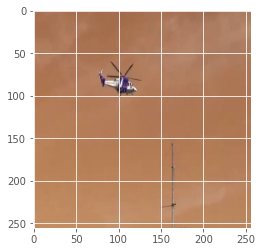

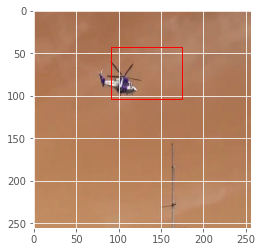

HELICOPTER - 99.16585087776184


In [112]:
index = 97
results(test_copies[index], test_bboxes[index], test_labels[index])

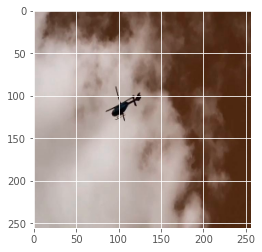

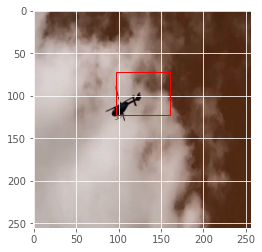

HELICOPTER - 98.10567498207092


In [113]:
index = 4
results(test_copies[index], test_bboxes[index], test_labels[index])

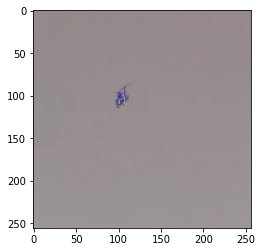

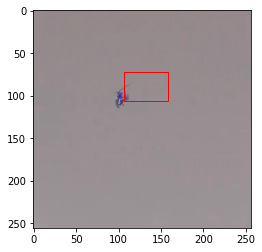

HELICOPTER - 72.05921411514282


In [75]:
index = 74
results(test_copies[index], test_bboxes[index], test_labels[index])

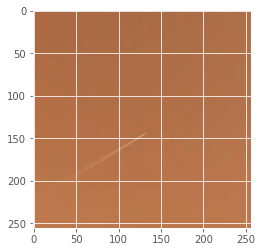

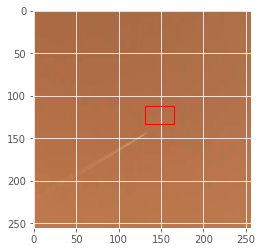

AIRPLANE - 75.24973154067993


In [106]:
index = 80
results(test_copies[index], test_bboxes[index], test_labels[index])

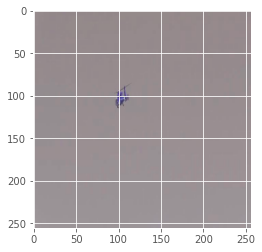

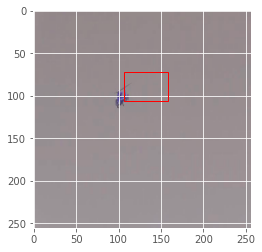

HELICOPTER - 72.05921411514282


In [108]:
index = 77
results(test_copies[index], test_bboxes[index], test_labels[index])

In [55]:
predictionString = []
for i in tqdm(range(len(test_bboxes))):
    l = str(test_labels[i][0])
    c = str(round(test_labels[i][1], 2))
    x = str(test_bboxes[i][0])
    y = str(test_bboxes[i][1])
    w = str(test_bboxes[i][2] + test_bboxes[i][0])
    h = str(test_bboxes[i][3] + test_bboxes[i][1])
    
    temp = [l, c, x, y, w, h]
    temp = ' '.join(temp)
    temp = '{' + temp + '}'
    predictionString.append(temp)

100%|██████████| 96/96 [00:00<00:00, 37886.07it/s]


In [56]:
results_df = pd.DataFrame({
    'Test Image': frame_id,
    'Prediction string': predictionString
})

In [57]:
results_df.head()

,Test Image,Prediction string
0,47.jpeg,{2 1.0 229.53883 60.673607 256.77148 76.35994}
1,10.jpeg,{0 0.76 189.19147 145.06615 231.12564 169.16148}
2,51.jpeg,{2 1.0 177.7503 110.03098 194.06598 120.27536}
3,92.jpeg,{3 0.96 163.0842 84.066414 205.87123 111.331}
4,84.jpeg,{3 0.98 96.511925 72.411644 160.3178 122.32983}


In [58]:
results_df.to_csv(os.path.join('/Applications/PES/6 Sem/TDL/HACKATHON/samplepesu/Dataframe', 'results_df.csv'), index=False)